In [1]:
## Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Reading data from hair_salon_no_show_wrangled_df.csv file
df_train = pd.read_csv("Medical_Data/KaggleV2-May-2016.csv")

In [5]:
df_train

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [22]:
df_train['PatientId'] = df_train['PatientId'].astype('int64') 
df_train['PatientId'] = df_train['PatientId'].astype('str')

### Preprocessing

1. PatientId - keep, to int to str (should we turn it into 1st unique - 1, 2nd - 2 .... - check)
2. AppointmentID - drop, all are uniqe - no value
3. Gender - binary 1/0
4. ScheduledDay  - datetime64
5. AppointmentDay  - datetime64
6. (new column) Day_of_week_of_appointment - 1-7 int64 /1hot encoding (check)
7. (new column) Days_to_apointment - AppointmentDay-ScheduledDay (5 negative records - remove)
8. Age - int64 (one person with age under 0)
9. Neighbourhood - int64 ( or 1 hot encoding)
10. Scholarship. hipertension, Diabetes, Alcoholism, Handcap (not binary - check), SMS_received - int64 (no change)
11. No-show - binary 1/0, 1 - didnt come to appointment, no-show:yes

In [23]:
df_train['ScheduledDay'] = pd.to_datetime(df_train['ScheduledDay']).dt.date.astype('datetime64[ns]')
df_train['AppointmentDay'] = pd.to_datetime(df_train['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [25]:
df = df_train.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [14]:
df_train['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62299, dtype: int64

In [26]:
df_train['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [29]:
df_train['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [4]:
df_train['No-show'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Data wrangling

df_train.drop(['AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df_train['No-show'] = df_train['No-show'].map({'Yes':1, 'No':0})
df_train['Neighbourhood'] = df_train['Neighbourhood'].factorize()[0]
df_train['Gender'] = df_train['Gender'].factorize()[0]
df_train

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,0,62,0,0,1,0,0,0,0,0
1,5.589978e+14,1,56,0,0,0,0,0,0,0,0
2,4.262962e+12,0,62,1,0,0,0,0,0,0,0
3,8.679512e+11,0,8,2,0,0,0,0,0,0,0
4,8.841186e+12,0,56,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,0,56,22,0,0,0,0,0,1,0
110523,3.596266e+12,0,51,22,0,0,0,0,0,1,0
110524,1.557663e+13,0,21,22,0,0,0,0,0,1,0
110525,9.213493e+13,0,38,22,0,0,0,0,0,1,0


In [48]:
features = df_train.columns[:-1]

X = df_train[features]
y = df_train['No-show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.02%


In [49]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[17690     0]
 [ 4416     0]]


In [50]:
df_train['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

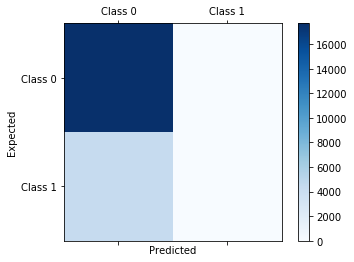

In [51]:
from matplotlib import pyplot as plt

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<img src="conf_matrix.jpeg">

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [13]:
print(' f1 ', f1_score(y_test, y_pred), '\n',
    'recall', recall_score(y_test, y_pred), '\n',
    'precision', precision_score(y_test, y_pred) )

 f1  0.0 
 recall 0.0 
 precision 0.0


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<img src="prec_rec.png">

---

<img src="resampling.png">

## Random under-sampling

In [14]:
count_class_0, count_class_1 = df_train['No-show'].value_counts()
count_class_0, count_class_1

(88208, 22319)

In [15]:
# Divide by class
df_class_0 = df_train[df_train['No-show'] == 0] # went to appointment
df_class_1 = df_train[df_train['No-show'] == 1] # didnt go to appointment

Random under-sampling:
1    22319
0    22319
Name: No-show, dtype: int64


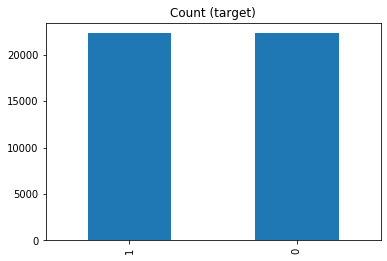

In [16]:
# Reducing the class 0 to size of class 1 (didnt show to appointment)

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['No-show'].value_counts())

df_test_under['No-show'].value_counts().plot(kind='bar', title='Count (target)');

In [17]:

X_u = df_test_under[features]
y_u = df_test_under['No-show']

X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.42%


In [18]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[2978 1505]
 [2207 2238]]


In [19]:
print(' f1 ', f1_score(y_test, y_pred), '\n',
    'recall', recall_score(y_test, y_pred), '\n',
    'precision', precision_score(y_test, y_pred) )

 f1  0.5466536394723986 
 recall 0.5034870641169854 
 precision 0.5979161100721346


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(X_test))
print(false_positive_rate, true_positive_rate, thresholds)

[0.         0.33571269 1.        ] [0.         0.50348706 1.        ] [2 1 0]


In [21]:
roc_auc_score(y_test, y_pred)

0.5838871858617494

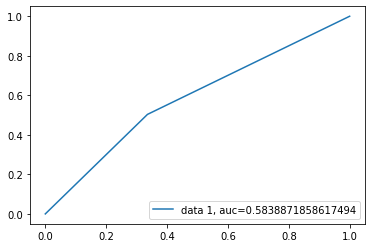

In [22]:
auc = roc_auc_score(y_test, y_pred)
plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

---
## imbalanced-learn module

In [42]:
import imblearn

In [43]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.59%


In [45]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[2293 2190]
 [1864 2581]]


In [46]:
print(' f1 ', f1_score(y_test, y_pred), '\n',
    'recall', recall_score(y_test, y_pred), '\n',
    'precision', precision_score(y_test, y_pred) )

 f1  0.5601128472222222 
 recall 0.580652418447694 
 precision 0.5409767344372249


---
## Visualizing sampling with PCA on 2D data

> experimental

In [23]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

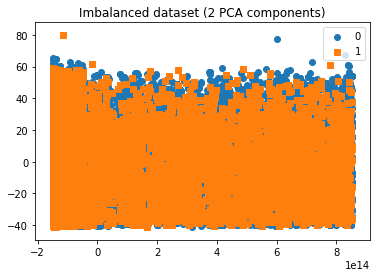

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')